# Задание 3


Цель: 

- Поработать с массивами в numpy 
- Нучиться считывать данные из csv и визуализировать их 
- Получить навыки решения задачи линейной регрессии (без обучения, с использованием нормального уравнения) 


Для выполнения задания используете набора данных http://people.sc.fsu.edu/~jburkardt/datasets/regression/x28.txt 

Можете попробовать ещё и другие наборы данных: http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html 

**Дополнительно** 

Если вы хотите чего-то более сложно, дополнительно можно попробовать решить задачу https://www.kaggle.com/c/house-prices-advanced-regression-techniques и отправить результат в kaggle. Для решения этой задачи мы ещё не разбирали много чего, но можете почитать обучающие материалы https://www.kaggle.com/c/house-prices-advanced-regression-techniques#tutorials 

## Загрузите данные 


Необходимо считать данные в numpy массив, и разделить их на X (атрибуты) и y (результат, последний столбец).

**Все данные нужно будет разделить в соотношении 80/20** Большую часть данных мы будем использовать для обучения. Оставшуюся часть для тестирования алгоритма. Мы пока не разибрали техники валидации, это тема для следующих заняний. Пока мы будем просто сравнивать ошибку на обучающей выборке и на тестовой. **Сделайте так, чтобы разделение на тестовую и обучающую выборку было случайным, но воспроизводимым (т.е. при каждом запуске получали одно и тоже разделение)** (с.м. numpy.random.seed)


In [12]:
import numpy as np 

from numpy import genfromtxt
raw_data = genfromtxt("x28.csv", delimiter=",", skip_header=1)
print(raw_data.shape)
print(raw_data.dtype)
raw

(60, 17)
float64


array([[   1.   ,   36.   ,   27.   , ...,   59.   ,   59.   ,  921.87 ],
       [   2.   ,   35.   ,   23.   , ...,   39.   ,   57.   ,  997.875],
       [   3.   ,   44.   ,   29.   , ...,   33.   ,   54.   ,  962.354],
       ..., 
       [  58.   ,   45.   ,   24.   , ...,    8.   ,   56.   ,  895.696],
       [  59.   ,   42.   ,   83.   , ...,   49.   ,   54.   ,  911.817],
       [  60.   ,   38.   ,   28.   , ...,   39.   ,   58.   ,  954.442]])

In [13]:
X_all = raw_data[:,0:16]
y_all = raw_data[:,16:]

print(X_all.shape)
print(y_all.shape)

(60, 16)
(60, 1)


In [22]:
indexes = np.arange(0, len(raw_data), 1)
print(indexes)

np.random.seed(31)
np.random.shuffle(indexes)
print(indexes)

sizeTrainData = int(indexes.shape[0] *4/5)

train_indexers, test_indexers = (indexes[:sizeTrainData], indexes[sizeTrainData:indexes.shape[0]])

X_train, X_test = (X_all[train_indexers, :], X_all[test_indexers, :])
y_train, y_test = (y_all[train_indexers, :], y_all[test_indexers, :])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59]
[ 4  5 36 13  2 30  8  3 32 57 43  7 41 53  0 21 22 48 19 12 14  9 45 50 33
 44 26 56 37 15 39 40 27  1 31 24 49 52 35 11 20 10 51 55 17 25 47 59  6 46
 42 54 38 29 28 58 34 16 23 18]


In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48, 16)
(12, 16)
(48, 1)
(12, 1)


## 2 Попробуйте построить несколько графиков, зависимость у от какого-то одного из аттрибутов

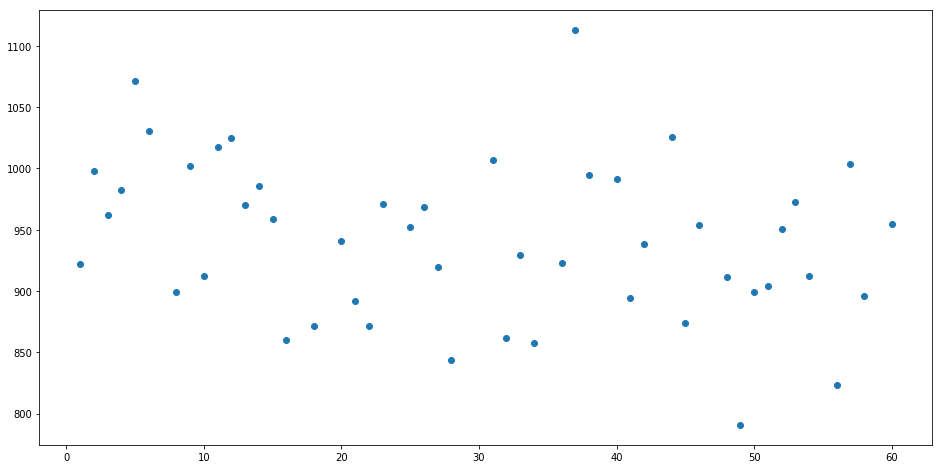

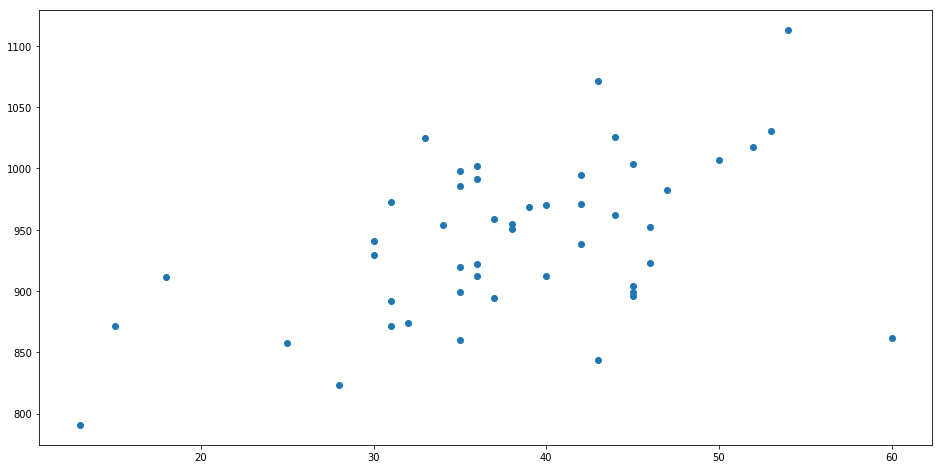

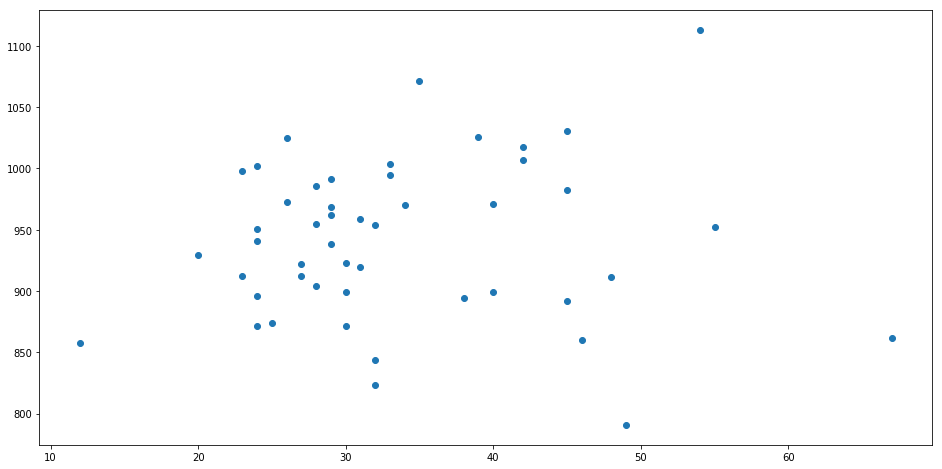

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.scatter(X_train[:,0], y_train)
plt.show()

plt.figure(figsize=(16, 8))
plt.scatter(X_train[:,1], y_train)
plt.show()

plt.figure(figsize=(16, 8))
plt.scatter(X_train[:,2], y_train)
plt.show()

Используйте нормальное уравление, чтобы найти коэффициенты 

$$
\omega = (X^TX)^{-1}X^Ty
$$

In [27]:
from numpy.linalg import pinv

print(X_train.shape)
print(y_train.shape)

w = pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
w

(48, 16)
(48, 1)


array([[ -2.04849672e-01],
       [  2.26527802e+00],
       [ -3.00135895e+00],
       [  9.91790846e-01],
       [  9.15797339e-01],
       [  1.11125472e+02],
       [ -1.14358490e+01],
       [  2.42843192e+00],
       [  1.17952045e-02],
       [  3.28931997e+00],
       [  3.10660014e+00],
       [  3.26752964e+00],
       [ -1.11702284e+00],
       [  2.41867119e+00],
       [ -5.55548995e-02],
       [  2.88579415e+00]])

## Проверьте результат 

Постройте модель линейной регрессии. Вычислите y_pred. И посчтитайте MSE. Проделайте тоже самое на тестовой выборке и сравните резултаты. 

In [28]:
def mse(y_pred, y):
    return (y_pred-y).T.dot(y_pred-y)/len(y_pred)

In [31]:
y_pred = X_train.dot(w)
y_pred

array([[ 1082.46422452],
       [ 1077.91493339],
       [ 1037.79204167],
       [  964.88824852],
       [  915.34248305],
       [ 1072.37383765],
       [  995.5121794 ],
       [ 1003.87222195],
       [  937.98742695],
       [  918.45418211],
       [ 1003.77059102],
       [  911.24918304],
       [  895.22918738],
       [  908.29058011],
       [  934.42700739],
       [  936.83627509],
       [  935.8915998 ],
       [  799.82074198],
       [  936.00824417],
       [  970.41819143],
       [  941.43375509],
       [  937.07730883],
       [  962.83770715],
       [  889.24958417],
       [  894.05142835],
       [  921.00176347],
       [  903.5498532 ],
       [  950.52708563],
       [  986.14190776],
       [  880.08467796],
       [  995.64344494],
       [  879.73840276],
       [  918.68126417],
       [  950.3861777 ],
       [  925.51554371],
       [  937.97685078],
       [  882.14665488],
       [  919.04659025],
       [  930.01549389],
       [ 1017.27973119],


In [32]:
print(y_pred.shape, y_train.shape)
print(mse(y_pred, y_train))

(48, 1) (48, 1)
[[ 1202.54504196]]


In [33]:
y_test_pred = X_test.dot(w)
y_test_pred

array([[  982.18415407],
       [  780.24204627],
       [  895.3607606 ],
       [  997.87143563],
       [ 1041.33908401],
       [  970.87253667],
       [  799.01283956],
       [  830.34199507],
       [  980.62644469],
       [  943.74075611],
       [  942.09015994],
       [ 1013.82521392]])

In [34]:
print(mse(y_test_pred, y_test))

[[ 2275.02167722]]


Визуализируйте данные, ответ в зависимости от первого аттрибута. На одно графике покажите предсказанные и настоящие значения. 

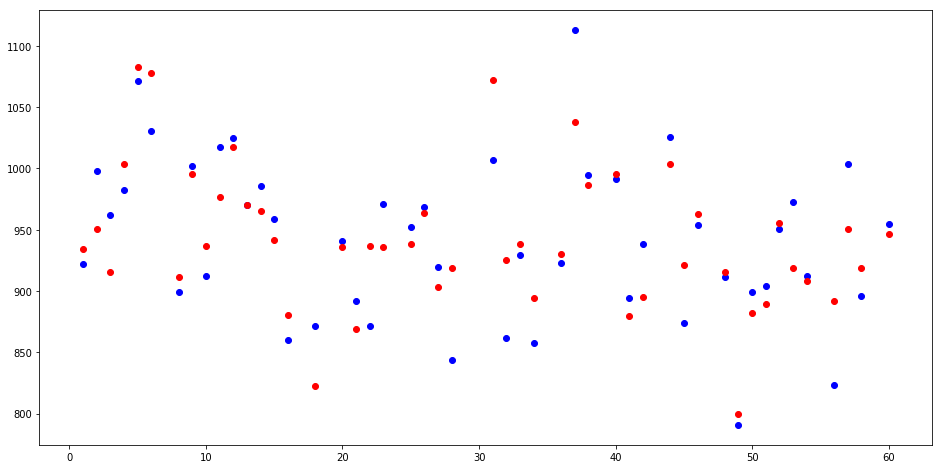

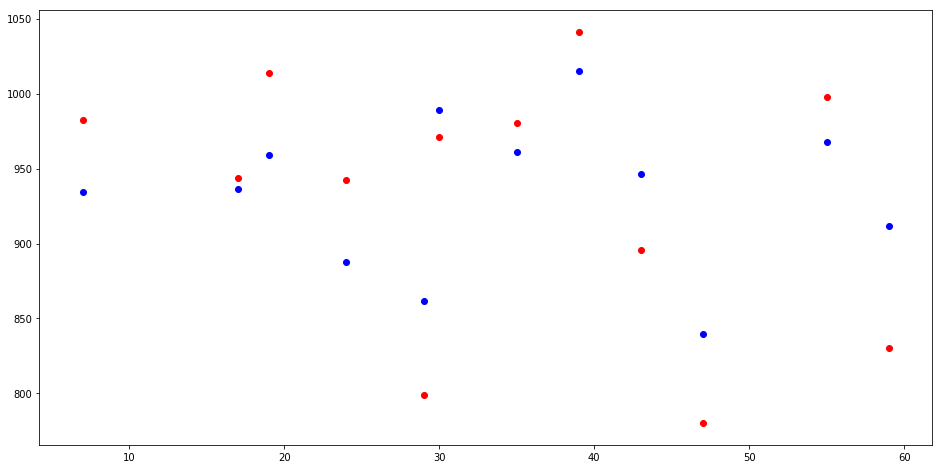

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.scatter(X_train[:,0], y_train,c='b')
plt.scatter(X_train[:,0], y_pred, c='r')
plt.show()


plt.figure(figsize=(16, 8))
plt.scatter(X_test[:,0], y_test,c='b')
plt.scatter(X_test[:,0], y_test_pred, c='r') 
plt.show()

В результате вы увидете что синие и красные (предсказанные) точки находятся рядом но не совпадают. 